# Feature Engg

In [ ]:
pip install plotly scikit-learn

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("./Data/processed.csv")
df.sample(10)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date
9695971,9695972,Mumbai,Maharashtra,India,19.0760,72.8777,TOYS4003,Board Game,112.0,3210.81,2022-08-24
2836863,2836864,Delhi,Delhi,India,28.7041,77.1025,ELEC1007,Gaming Console,123.0,92694.88,2022-11-05
4700680,4700681,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,TOYS4003,Board Game,88.0,5465.60,2022-03-02
8369051,8369052,Los Angeles,CA,USA,34.0522,-118.2437,ELEC1008,Bluetooth Speaker,64.8,3212.07,2022-06-07
3292980,3292981,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,ELEC1002,Laptop,60.0,115483.71,2023-11-23
404302,404303,New York,NY,USA,40.7128,-74.0060,HOME3001,Sofa,79.0,65273.91,2024-04-26
501325,501326,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,TOYS4005,Remote Control Car,128.0,12855.66,2022-08-27
5166216,5166217,Delhi,Delhi,India,28.7041,77.1025,CLOT2001,Men T-shirt,52.0,2219.68,2022-05-30
2696680,2696681,Los Angeles,CA,USA,34.0522,-118.2437,ELEC1006,Camera,36.8,29186.58,2023-03-23
5703448,5703449,Miami,FL,USA,25.7617,-80.1918,TOYS4003,Board Game,84.0,3351.63,2024-06-28


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'] >= 5

In [6]:
df.head(5)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend
0,1,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,FOOD6004,Coffee,60.0,1014.52,2023-11-16,2023,11,46,16,3,False
1,2,Hyderabad,Telangana,India,17.3850,78.4867,BOOK5004,Self-help Book,86.4,3321.36,2022-02-10,2022,2,6,10,3,False
2,3,Delhi,Delhi,India,28.7041,77.1025,BOOK5001,Novel,59.0,1244.63,2022-12-05,2022,12,49,5,0,False
3,4,Toronto,Ontario,Canada,43.6510,-79.3470,FOOD6005,Energy Drinks,18.0,237.82,2024-08-01,2024,8,31,1,3,False
4,5,Chicago,IL,USA,41.8781,-87.6298,HOME3003,Bed,56.0,30791.05,2024-07-13,2024,7,28,13,5,True


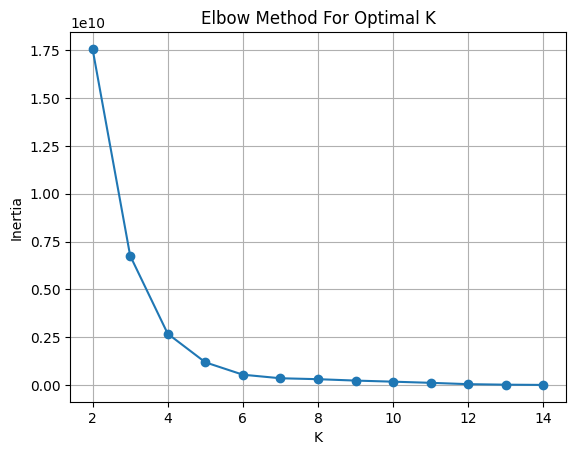

CPU times: user 1min 25s, sys: 1min 28s, total: 2min 53s
Wall time: 44.4 s


In [7]:
%%time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Latitude', 'Longitude']]
inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [14]:
from sklearn.cluster import KMeans
X = df[['Latitude', 'Longitude']]

# Choose number of clusters
k = 4  #  elbow method to tune
kmeans = KMeans(n_clusters=k, random_state=42)
df['GeoCluster'] = kmeans.fit_predict(X)

print("Cluster distribution:")
print(df['GeoCluster'].value_counts())

Cluster distribution:
GeoCluster
0    3463835
1    3414817
2    1853437
3    1267911
Name: count, dtype: int64


In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

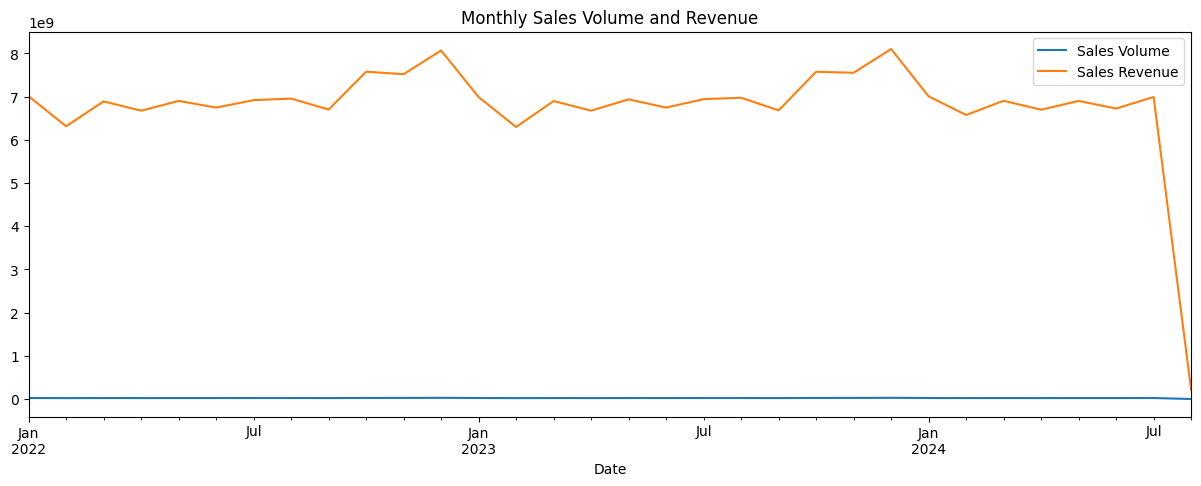

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv("your_dataset.csv")

# Check missing
#sns.heatmap(df.isnull(), cbar=False)

# Basic sales trend
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg({
    # 'Sales Volume': 'sum',
    'Sales Revenue': 'sum'
})
monthly_sales.plot(figsize=(15, 5))
plt.title("Monthly Sales Volume and Revenue")
plt.show()

In [9]:
df['Year'].value_counts()

Year
2023    3865966
2022    3864990
2024    2269044
Name: count, dtype: int64

In [8]:
df.head(3)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend,GeoCluster
0,1,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,FOOD6004,Coffee,60.0,1014.52,2023-11-16,2023,11,46,16,3,False,3
1,2,Hyderabad,Telangana,India,17.3850,78.4867,BOOK5004,Self-help Book,86.4,3321.36,2022-02-10,2022,2,6,10,3,False,0
2,3,Delhi,Delhi,India,28.7041,77.1025,BOOK5001,Novel,59.0,1244.63,2022-12-05,2022,12,49,5,0,False,0


In [16]:
df_2022 = df[df['Year']==2022]

In [17]:
df_2023 = df[df['Year']==2023]

In [18]:
df_2024 = df[df['Year']==2024]

In [19]:
df_2022.head(3)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend,GeoCluster
1,2,Hyderabad,Telangana,India,17.3850,78.4867,BOOK5004,Self-help Book,86.4,3321.36,2022-02-10,2022,2,6,10,3,False,0
2,3,Delhi,Delhi,India,28.7041,77.1025,BOOK5001,Novel,59.0,1244.63,2022-12-05,2022,12,49,5,0,False,0
6,7,New York,NY,USA,40.7128,-74.0060,ELEC1005,Headphones,120.0,32710.80,2022-05-22,2022,5,20,22,6,True,1


In [20]:
df_2023.head(3)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend,GeoCluster
0,1,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,FOOD6004,Coffee,60.0,1014.52,2023-11-16,2023,11,46,16,3,False,3
7,8,Chennai,Tamil Nadu,India,13.0827,80.2707,HOME3001,Sofa,14.0,18373.16,2023-05-22,2023,5,21,22,0,False,0
8,9,Toronto,Ontario,Canada,43.6510,-79.3470,HOME3004,Microwave,25.0,4600.74,2023-05-27,2023,5,21,27,5,True,1


In [21]:
df_2024.head(3)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend,GeoCluster
3,4,Toronto,Ontario,Canada,43.6510,-79.3470,FOOD6005,Energy Drinks,18.0,237.82,2024-08-01,2024,8,31,1,3,False,1
4,5,Chicago,IL,USA,41.8781,-87.6298,HOME3003,Bed,56.0,30791.05,2024-07-13,2024,7,28,13,5,True,1
5,6,Chicago,IL,USA,41.8781,-87.6298,ELEC1008,Bluetooth Speaker,81.6,7192.71,2024-07-09,2024,7,28,9,1,False,1


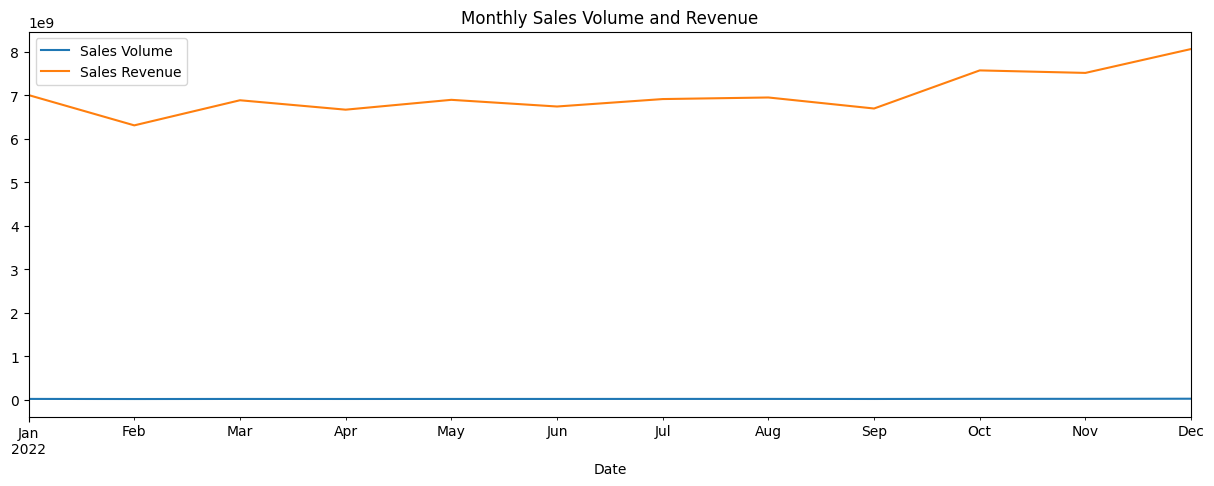

In [23]:
#sns.heatmap(df_2022.isnull(), cbar=False)

# Basic sales trend
df_2022['Date'] = pd.to_datetime(df_2022['Date'])
monthly_sales = df_2022.groupby(df_2022['Date'].dt.to_period("M")).agg({
    'Sales Volume': 'sum',
    'Sales Revenue': 'sum'
})
monthly_sales.plot(figsize=(15, 5))
plt.title("Monthly Sales Volume and Revenue")
plt.show()

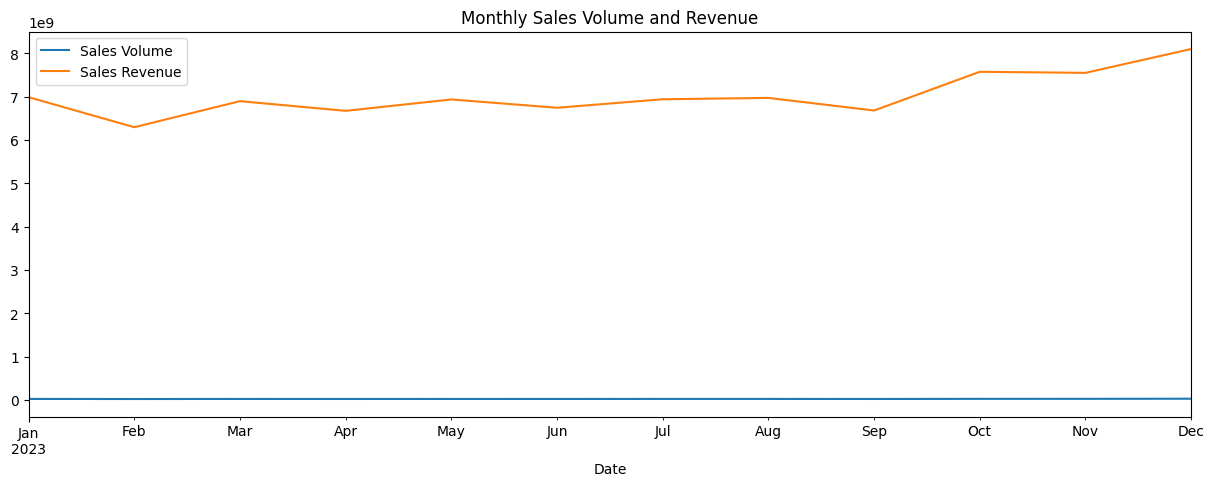

In [24]:
#sns.heatmap(df_2024.isnull(), cbar=False)

# Basic sales trend
df_2023['Date'] = pd.to_datetime(df_2023['Date'])
monthly_sales = df_2023.groupby(df_2023['Date'].dt.to_period("M")).agg({
    'Sales Volume': 'sum',
    'Sales Revenue': 'sum'
})
monthly_sales.plot(figsize=(15, 5))
plt.title("Monthly Sales Volume and Revenue")
plt.show()

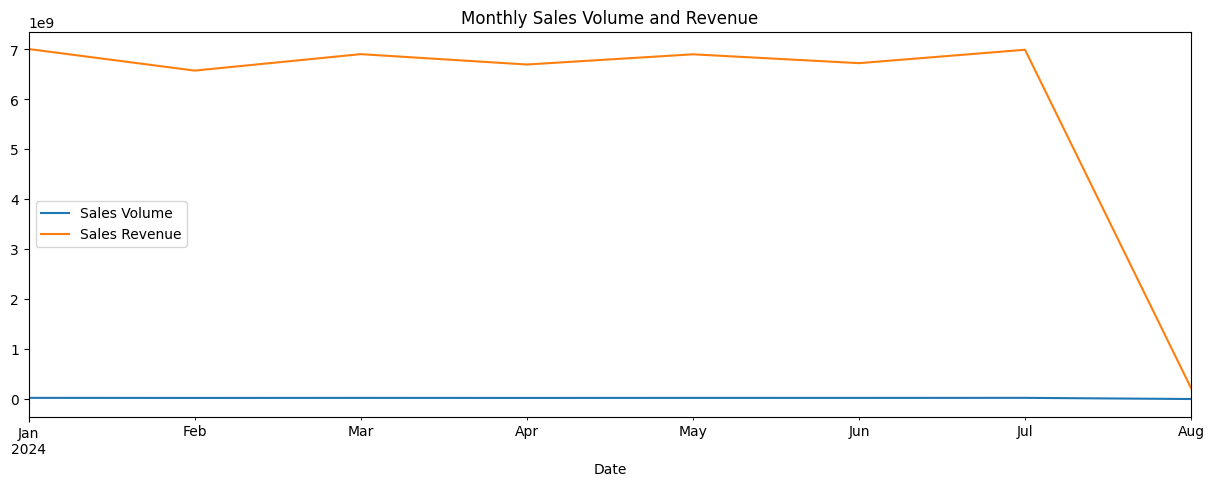

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Check missing
#sns.heatmap(df_2024.isnull(), cbar=False)

# Basic sales trend
df_2024['Date'] = pd.to_datetime(df_2024['Date'])
monthly_sales = df_2024.groupby(df_2024['Date'].dt.to_period("M")).agg({
    'Sales Volume': 'sum',
    'Sales Revenue': 'sum'
})
monthly_sales.plot(figsize=(15, 5))
plt.title("Monthly Sales Volume and Revenue")
plt.show()

In [16]:
df_2024['Month'].value_counts()

Month
7    330173
5    328372
3    328311
1    327432
4    317964
6    317766
2    308504
8     10522
Name: count, dtype: int64

In [25]:
df['GeoClusterName'] = df['GeoCluster'].apply(lambda x: f"Cluster {chr(65 + x)}")

In [26]:
df.head(3)

,Location ID,City,State,Country,Latitude,Longitude,Product ID,Product Category,Sales Volume,Sales Revenue,Date,Year,Month,Week,Day,DayOfWeek,IsWeekend,GeoCluster,GeoClusterName
0,1,Tokyo,Tokyo Prefecture,Japan,35.6895,139.6917,FOOD6004,Coffee,60.0,1014.52,2023-11-16,2023,11,46,16,3,False,3,Cluster D
1,2,Hyderabad,Telangana,India,17.3850,78.4867,BOOK5004,Self-help Book,86.4,3321.36,2022-02-10,2022,2,6,10,3,False,0,Cluster A
2,3,Delhi,Delhi,India,28.7041,77.1025,BOOK5001,Novel,59.0,1244.63,2022-12-05,2022,12,49,5,0,False,0,Cluster A


In [27]:
df.to_csv("Feature_engg.csv",index=False)
